In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sio
import pickle
from scipy.stats import betabinom
import seaborn as sns
%matplotlib inline

In [2]:
def compute_beta(alpha, n, mean):
    return (1-mean/n) / (mean/n) * alpha


def compute_alpha(n, mean, variance):
    ratio = (1-mean/n) / (mean/n)
    alpha = ((1+ratio)**2 * variance - n**2 * ratio) / (n*ratio*(1+ratio) - variance* (1 + ratio)**3)
    return alpha

In [3]:
def generate_beta_bionm_1():
    n = 60
    mu = 12 
    sigma = 5
    alpha = compute_alpha(n , mu, sigma**2) 
    beta = compute_beta(alpha, n, mu)
    x = betabinom.rvs(n, alpha, beta, size=1000)
    
    return x,alpha,beta

In [4]:
def generate_beta_binom_2():
    n1 = 30
    mu1 = 12
    sigma1 = 3
    alpha1 = compute_alpha(n1 , mu1, sigma1**2)
    beta1 = compute_beta(alpha1, n1, mu1)
    x1 = betabinom.rvs(n1, alpha1, beta1, size=1000)
    
    return x1,alpha1,beta1

In [5]:
x,alpha,beta = generate_beta_bionm_1()
#x1,alpha1,beta1 = generate_beta_binom_2()

In [6]:
alpha,beta

(7.1558441558441555, 28.623376623376622)

In [143]:
len(x)

1000

/home/rohit/anaconda3/envs/Slam_python_3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


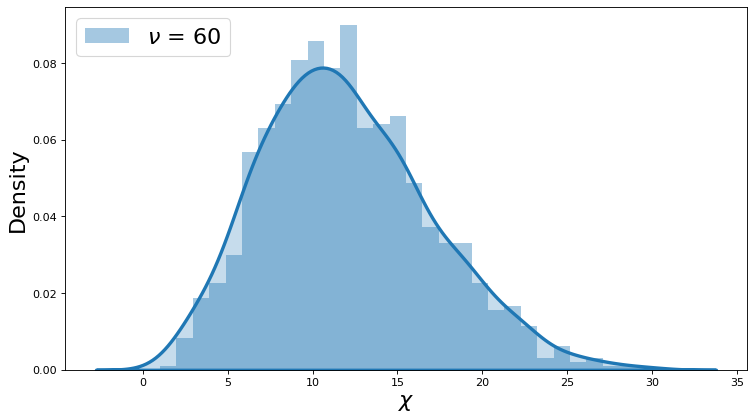

In [150]:
# x = betabinom.rvs(n, alpha, beta, size=1000)

plt.figure(figsize=(11, 6), dpi=80)

sns.distplot(x, hist = True, kde = True, bins=30, kde_kws = {'shade': True,'linewidth': 3},label=r"$\nu$ = 60")
#plt.title('Beta binomial Distribution for number of node to suppress')

plt.xlabel('$\chi$',fontweight="light",fontsize=20)
plt.ylabel('Density',fontweight="light",fontsize=20)
plt.legend(loc = 'upper left', prop={'size': 20})

In [23]:
dist_1 = []
dist_2 = []

for i in range(10):
    x,alpha,beta = generate_beta_bionm_1()
    x1,alpha1,beta1 = generate_beta_binom_2()
    
    num_occur = {}
    for i in range(max(x)+1):
        num_occur[i] = len(np.where(x==i)[0])/len(x)
    dist_1.append(num_occur)
        
    num_occur_1 = {}
    for i in range(max(x1)+1):
        num_occur_1[i] = len(np.where(x1==i)[0])/len(x1)
    dist_2.append(num_occur_1)

In [24]:
#Beta-binom 1
keys = []
values = []
for k_v in dist_1:
    keys.append(list(k_v.keys()))
    values.append(list(k_v.values()))

selected_values = []
for val in values:
    selected_values.append(val[:26])

In [25]:
#Beta-binom 1
keys_1 = []
values_1 = []
for k_v_1 in dist_2:
    keys_1.append(list(k_v_1.keys()))
    values_1.append(list(k_v_1.values()))

selected_values_1 = []
for val_1 in values_1:
    selected_values_1.append(val_1[:21])

In [26]:
for i in keys:
    print(max(i))

27
26
27
28
29
27
28
28
26
28


In [27]:
for j in keys_1:
    print(max(j))

23
23
22
21
22
21
21
21
21
21


In [28]:
mean_x1 = np.mean(selected_values,axis=0)
std_x1 = np.std(selected_values,axis=0)

In [50]:
mean_x2 = np.mean(selected_values_1,axis=0)
std_x2 = np.std(selected_values_1,axis=0)

In [52]:
mean_x2 = np.append(mean_x2,[0.0,0.0,0.0,0.0,0.0])
std_x2 = np.append(std_x2,[0.0,0.0,0.0,0.0,0.0])

In [31]:
# num_occur = {}
# for i in range(max(x)+1):
    
#     num_occur[i] = len(np.where(x==i)[0])/len(x)

In [32]:
# num_occur_1 = {}
# for i in range(max(x1)+1):
    
#     num_occur_1[i] = len(np.where(x1==i)[0])/len(x1)

In [33]:
# plt.figure(figsize=(11, 7), dpi=80)
# plt.plot([], [], ' ', label=r"$\nu$ = 30")
# plt.plot(num_occur.keys(),num_occur.values(),'-o',color = 'red',label = r'$\alpha$ = 4.29, $\beta$ = 6.43 / $\mu$ = 12, $\sigma$ = 5')
# plt.plot(num_occur_1.keys(),num_occur_1.values(),'-o',color = 'blue',label = r'$\alpha_{1}$ = 45.99, $\beta_{1}$ = 68.99 / $\mu_{1}$ = 12, $\sigma_{1}$ = 3')

# plt.xlabel('$\chi$',fontweight="light",fontsize=20)
# plt.ylabel('P(P = $\chi$)',fontweight="light",fontsize=20)
# plt.legend(loc = 'upper right', prop={'size': 12})

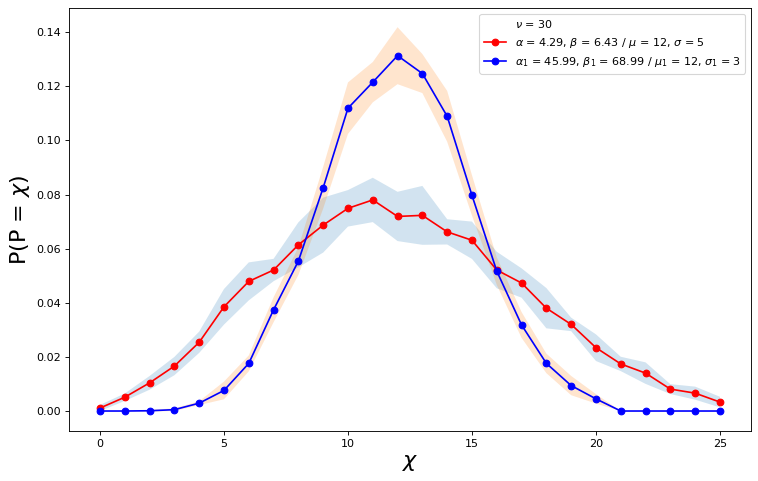

In [53]:
plt.figure(figsize=(11, 7), dpi=80)
plt.plot([], [], ' ', label=r"$\nu$ = 30")
plt.plot(list(range(len(mean_x1))),mean_x1,'-o',color = 'red',label = r'$\alpha$ = 4.29, $\beta$ = 6.43 / $\mu$ = 12, $\sigma$ = 5')
plt.fill_between(list(range(len(mean_x1))), mean_x1 - std_x1, mean_x1 + std_x1, alpha=0.2)
plt.plot(list(range(len(mean_x2))),mean_x2,'-o',color = 'blue',label = r'$\alpha_{1}$ = 45.99, $\beta_{1}$ = 68.99 / $\mu_{1}$ = 12, $\sigma_{1}$ = 3')
plt.fill_between(list(range(len(mean_x2))), mean_x2 - std_x2, mean_x2 + std_x2, alpha=0.2)

plt.xlabel('$\chi$',fontweight="light",fontsize=20)
plt.ylabel('P(P = $\chi$)',fontweight="light",fontsize=20)
plt.legend(loc = 'upper right', prop={'size': 10})

In [2]:
path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/Oasis_original_new_with_dummy/'

In [3]:
graph_0 = nx.read_gpickle(path + 'modified_graphs/graph_00000.gpickle')
graph_1 = nx.read_gpickle(path + 'modified_graphs/graph_00001.gpickle')

In [10]:
graph_1.nodes.data()[0]

{'vertex_index': 5139,
 'sphere_3dcoords': array([ -0.23501231, -99.5291748 ,  -9.6895895 ]),
 'sphere_coords': [1.5684350728988647, 1.667844533920288],
 'basin_label': 204.0,
 'basin_area': 822.709,
 'depth': -1.0727112,
 'basin_thickness': 2.5196378231048584,
 'ico100_7_vertex_index': 30249,
 'label_neuroimage': 54,
 'label_media': 79,
 'sphere_3dcoords_noreg': array([ 16.33407 , -97.624435, -14.236153], dtype=float32),
 'ico100_7_vertex_index_noreg': 15311,
 'is_dummy': False}

In [ ]:
X_mals = sio.loadmat(path+'X_mALS.mat')['X']

In [ ]:
nb_nodes = 101

i = 0 # graph_0 
j = 1 # graph_1

iscope = range(i * nb_nodes, (i+1) * nb_nodes)
jscope = range(j * nb_nodes, (j+1) * nb_nodes)

Xij = np.array(X_mals[np.ix_(iscope, jscope)], dtype=int)

In [ ]:
Xij[:,95]

In [151]:
st = 'X_cao_cst_o.mat'

In [165]:
'F1_score_'+st.split('.')[0]

'F1_score_X_cao_cst_o'

In [167]:
st.split()

TypeError: 'builtin_function_or_method' object is not subscriptable